# Anomaly Detection

The objective of this notebook is to create a reconstruction autoencoder AI model to detect ssh login intrusion.

In [81]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns

from keras.models import Model, Sequential
from keras.layers import Dense
from keras import Input, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

sns.set(font_scale=1.4)
sns.set_style("white")
sns.set_style("ticks")

The following data is extracted from the syslog of a Linux VM on Azure. "myazure1" is a valid user that has successfully logged into the VM several times. Other users are unsuccessfully tried by the bots on the internet. Although the data is labelled, the labels are used only to validate the efficacy of the model.

The definition of the data attributes are given below
- **login_success** - Whether the SSH login is successful (1) or not (0)
- **wrong_password** - Whether the SSH password was wrong (1) or correct (0)
- **invalid_user** - Whether the SSH user is invalid (1) or valid (0)
- **last_login_success** - Whether the given user's last login was successful (1) or not (0)
- **last_ip_login_failure** - Whether the source IP and user combination failed to login last time (1) or not (0)
- **anomaly** - Whether there  is anomaly (1) or not (0). All the users tried by the bots on the internet are marked as anomaly

In [82]:
PATH_TO_DATA = 'https://raw.githubusercontent.com/saptarshibasu/anomaly-detection/main/sample-data/sshlogin_3.csv'

data = pd.read_csv(PATH_TO_DATA, header = 0)

data.head(100)

,login_success,wrong_password,invalid_user,last_login_success,last_ip_login_failure,user,source_ip,source_port,anomaly
0,0,0,1,0,0,profile1,102.22.177.9,50290,1
1,0,0,1,0,1,profile1,102.22.177.9,56554,1
2,0,0,1,0,1,profile1,102.22.177.9,51287,1
3,0,0,1,0,1,profile1,102.22.177.9,65310,1
4,0,0,1,0,0,user1,102.22.177.9,65164,1
...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,0,root,138.197.180.102,35634,1
96,1,0,0,1,0,myazure1,223.191.32.164,41570,0
97,1,0,0,1,0,myazure1,223.191.32.164,41569,0
98,0,0,1,0,0,tech,49.234.5.191,52984,1


### Data Preparation

In [83]:
TARGET = 'anomaly'
USER = 'user'
SOURCE_IP = 'source_ip'
SOURCE_PORT = 'source_port'

features = data.drop([TARGET, USER, SOURCE_IP, SOURCE_PORT], axis=1) / 2
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

train_index = y_train[y_train == 0].index
train_data = x_train   #.loc[train_index]
target_data = y_train   #.loc[train_index]

features.head()

,login_success,wrong_password,invalid_user,last_login_success,last_ip_login_failure
0,0.0,0.0,0.5,0.0,0.0
1,0.0,0.0,0.5,0.0,0.5
2,0.0,0.0,0.5,0.0,0.5
3,0.0,0.0,0.5,0.0,0.5
4,0.0,0.0,0.5,0.0,0.0


### Reconstruction Autoencoder Model

In [84]:
model = Sequential(
[
    Input(shape = (train_data.shape[1],)),
    Dense(5, activation=tf.nn.relu),
    Dense(3, activation=tf.nn.relu),
    Dense(5, activation=tf.nn.sigmoid)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = model.fit(train_data, train_data, 
          epochs=1000,
          batch_size=200,
          shuffle=True,
          validation_split=0.3,
          callbacks=[
              callbacks.EarlyStopping(monitor="val_loss", patience=5)
          ],
        )


Epoch 1/1000
2/2 [==============================] - 3s 537ms/step - loss: 0.1556 - val_loss: 0.1558
Epoch 2/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.1547 - val_loss: 0.1553
Epoch 3/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.1546 - val_loss: 0.1549
Epoch 4/1000
2/2 [==============================] - 0s 70ms/step - loss: 0.1541 - val_loss: 0.1545
Epoch 5/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.1541 - val_loss: 0.1540
Epoch 6/1000
2/2 [==============================] - 0s 75ms/step - loss: 0.1530 - val_loss: 0.1536
Epoch 7/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.1532 - val_loss: 0.1532
Epoch 8/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.1524 - val_loss: 0.1528
Epoch 9/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.1520 - val_loss: 0.1525
Epoch 10/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.1516 - val_loss: 0.1521
Epoch 11

2/2 [==============================] - 0s 41ms/step - loss: 0.1312 - val_loss: 0.1315
Epoch 81/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.1308 - val_loss: 0.1312
Epoch 82/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.1304 - val_loss: 0.1309
Epoch 83/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.1299 - val_loss: 0.1306
Epoch 84/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.1298 - val_loss: 0.1303
Epoch 85/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.1299 - val_loss: 0.1301
Epoch 86/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.1290 - val_loss: 0.1298
Epoch 87/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.1293 - val_loss: 0.1295
Epoch 88/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.1288 - val_loss: 0.1292
Epoch 89/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.1285 - val_loss: 0.1289
Epoch 90/1000


2/2 [==============================] - 0s 54ms/step - loss: 0.0841 - val_loss: 0.0845
Epoch 162/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0833 - val_loss: 0.0836
Epoch 163/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0820 - val_loss: 0.0827
Epoch 164/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0816 - val_loss: 0.0819
Epoch 165/1000
2/2 [==============================] - ETA: 0s - loss: 0.080 - 0s 54ms/step - loss: 0.0808 - val_loss: 0.0810
Epoch 166/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0805 - val_loss: 0.0802
Epoch 167/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.0788 - val_loss: 0.0793
Epoch 168/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.0779 - val_loss: 0.0785
Epoch 169/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.0777 - val_loss: 0.0777
Epoch 170/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0769 

Epoch 242/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.0337 - val_loss: 0.0349
Epoch 243/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0341 - val_loss: 0.0347
Epoch 244/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.0335 - val_loss: 0.0344
Epoch 245/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0340 - val_loss: 0.0342
Epoch 246/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0331 - val_loss: 0.0340
Epoch 247/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0340 - val_loss: 0.0338
Epoch 248/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0336 - val_loss: 0.0335
Epoch 249/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0322 - val_loss: 0.0333
Epoch 250/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0327 - val_loss: 0.0331
Epoch 251/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0322 - val_los

Epoch 323/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0258 - val_loss: 0.0275
Epoch 324/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0261 - val_loss: 0.0275
Epoch 325/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0262 - val_loss: 0.0274
Epoch 326/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0275 - val_loss: 0.0274
Epoch 327/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0276 - val_loss: 0.0274
Epoch 328/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.0269 - val_loss: 0.0274
Epoch 329/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0272 - val_loss: 0.0273
Epoch 330/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0274 - val_loss: 0.0273
Epoch 331/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0267 - val_loss: 0.0273
Epoch 332/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0263 - val_los

2/2 [==============================] - 0s 50ms/step - loss: 0.0245 - val_loss: 0.0264
Epoch 404/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0269 - val_loss: 0.0264
Epoch 405/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0260 - val_loss: 0.0264
Epoch 406/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0264 - val_loss: 0.0264
Epoch 407/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0251 - val_loss: 0.0264
Epoch 408/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0268 - val_loss: 0.0264
Epoch 409/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.0265 - val_loss: 0.0264
Epoch 410/1000
2/2 [==============================] - 0s 82ms/step - loss: 0.0251 - val_loss: 0.0264
Epoch 411/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0268 - val_loss: 0.0263
Epoch 412/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.0253 - val_loss: 0.0263
Epoch

2/2 [==============================] - 0s 51ms/step - loss: 0.0260 - val_loss: 0.0257
Epoch 485/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.0252 - val_loss: 0.0257
Epoch 486/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0265 - val_loss: 0.0257
Epoch 487/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0251 - val_loss: 0.0257
Epoch 488/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0256 - val_loss: 0.0257
Epoch 489/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0251 - val_loss: 0.0256
Epoch 490/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0254 - val_loss: 0.0256
Epoch 491/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.0238 - val_loss: 0.0256
Epoch 492/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.0254 - val_loss: 0.0256
Epoch 493/1000
2/2 [==============================] - 0s 60ms/step - loss: 0.0249 - val_loss: 0.0256
Epoch

Epoch 565/1000
2/2 [==============================] - 0s 64ms/step - loss: 0.0236 - val_loss: 0.0244
Epoch 566/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0244 - val_loss: 0.0244
Epoch 567/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.0233 - val_loss: 0.0244
Epoch 568/1000
2/2 [==============================] - 0s 60ms/step - loss: 0.0222 - val_loss: 0.0244
Epoch 569/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 570/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0239 - val_loss: 0.0243
Epoch 571/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0234 - val_loss: 0.0243
Epoch 572/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0240 - val_loss: 0.0243
Epoch 573/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0235 - val_loss: 0.0243
Epoch 574/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0228 - val_los

Epoch 646/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0216 - val_loss: 0.0222
Epoch 647/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0208 - val_loss: 0.0221
Epoch 648/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0226 - val_loss: 0.0221
Epoch 649/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0223 - val_loss: 0.0221
Epoch 650/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0214 - val_loss: 0.0220
Epoch 651/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0218 - val_loss: 0.0220
Epoch 652/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.0212 - val_loss: 0.0220
Epoch 653/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0211 - val_loss: 0.0219
Epoch 654/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0222 - val_loss: 0.0219
Epoch 655/1000
2/2 [==============================] - 0s 60ms/step - loss: 0.0217 - val_los

2/2 [==============================] - 0s 42ms/step - loss: 0.0190 - val_loss: 0.0193
Epoch 727/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0197 - val_loss: 0.0192
Epoch 728/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0179 - val_loss: 0.0192
Epoch 729/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0178 - val_loss: 0.0192
Epoch 730/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0182 - val_loss: 0.0191
Epoch 731/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 732/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0188 - val_loss: 0.0191
Epoch 733/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 734/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0199 - val_loss: 0.0190
Epoch 735/1000
2/2 [==============================] - 0s 78ms/step - loss: 0.0188 - val_loss: 0.0190
Epoch

2/2 [==============================] - 0s 48ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 808/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 809/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0178 - val_loss: 0.0168
Epoch 810/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0168 - val_loss: 0.0168
Epoch 811/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0183 - val_loss: 0.0167
Epoch 812/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0171 - val_loss: 0.0167
Epoch 813/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.0166 - val_loss: 0.0167
Epoch 814/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0170 - val_loss: 0.0167
Epoch 815/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0163 - val_loss: 0.0167
Epoch 816/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.0170 - val_loss: 0.0166
Epoch

2/2 [==============================] - 0s 48ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 889/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0149 - val_loss: 0.0153
Epoch 890/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 891/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0162 - val_loss: 0.0153
Epoch 892/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0158 - val_loss: 0.0153
Epoch 893/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0155 - val_loss: 0.0152
Epoch 894/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0145 - val_loss: 0.0152
Epoch 895/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0157 - val_loss: 0.0152
Epoch 896/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0161 - val_loss: 0.0152
Epoch 897/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.0151 - val_loss: 0.0152
Epoch

2/2 [==============================] - 0s 47ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 970/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 971/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 972/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 973/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0146 - val_loss: 0.0144
Epoch 974/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0142 - val_loss: 0.0143
Epoch 975/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0137 - val_loss: 0.0143
Epoch 976/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0145 - val_loss: 0.0143
Epoch 977/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0135 - val_loss: 0.0143
Epoch 978/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0140 - val_loss: 0.0143
Epoch

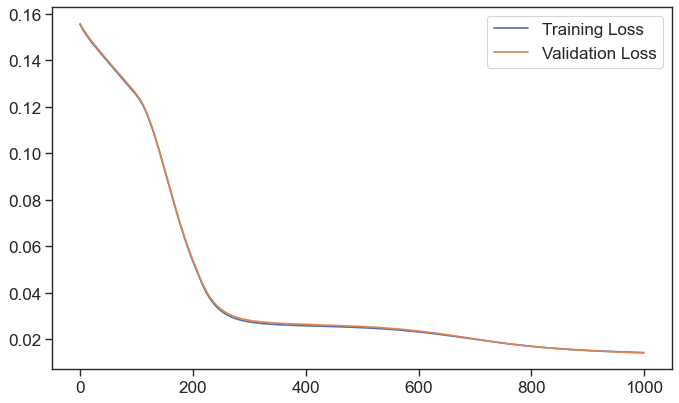

In [85]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

### Identify Reconstruction Error Threshold for Identifying Anomaly

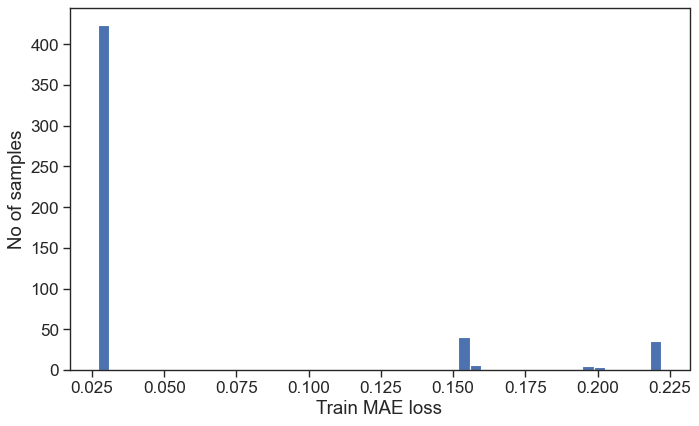

Reconstruction error threshold:  0.027


In [86]:
train_pred = model.predict(train_data)
train_mae_loss = np.mean(np.abs(train_pred - train_data), axis=1)

train_mae_loss_df = train_mae_loss.to_frame()
train_mae_loss_df.columns = ['anomaly']
train_mae_loss_counts_df = train_mae_loss_df.groupby(['anomaly']).size().reset_index(name='counts')
threshold = np.ceil(train_mae_loss_counts_df[train_mae_loss_counts_df["counts"] > 60]['anomaly'].max() * 1000) / 1000

plt.figure(figsize=(10, 6), dpi=80)
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

print("Reconstruction error threshold: ", threshold)

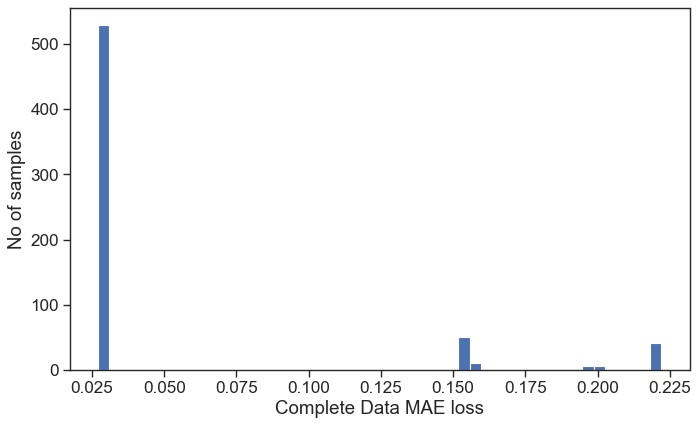

In [87]:
features_pred = model.predict(features)
features_mae_loss = np.mean(np.abs(features_pred - features), axis=1)

plt.figure(figsize=(10, 6), dpi=80)
plt.hist(features_mae_loss, bins=50)
plt.xlabel("Complete Data MAE loss")
plt.ylabel("No of samples")
plt.show()


### Mark The Record As Anomaly If Reconstruction Error Is Above Threshold

In [88]:
features_loss = features_mae_loss.to_frame()

features_loss.columns = ['anomaly']

features_loss.loc[features_loss.anomaly > threshold, "anomaly"] = 1
features_loss.loc[features_loss.anomaly <= threshold, "anomaly"] = 0

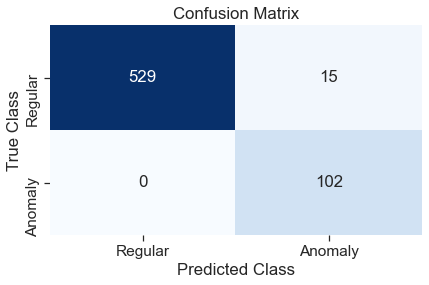

In [89]:
target.columns = ['anomaly']

matrix = confusion_matrix(target, features_loss)
confusion_df = pd.DataFrame(matrix, index = ['Regular', 'Anomaly'], columns = ['Regular', 'Anomaly'])

sns.heatmap(confusion_df, annot=True, fmt="d", cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

### View The False Positive Cases

In [62]:
indexmae = features_mae_loss[features_mae_loss>threshold].index

anomalies = data.loc[indexmae]

anomalies[anomalies['anomaly'] == 0]

,login_success,wrong_password,invalid_user,last_login_success,last_ip_login_failure,user,source_ip,source_port,anomaly
12,0,1,0,0,0,myazure1,182.66.55.189,36534,0
25,1,0,0,0,0,myazure1,223.191.32.164,51625,0
64,0,1,0,1,0,myazure1,223.191.32.164,18245,0
78,1,0,0,0,1,myazure1,223.191.32.164,3150,0
88,0,1,0,1,0,myazure1,223.191.32.164,37394,0
89,1,0,0,0,1,myazure1,223.191.32.164,51287,0
162,0,1,0,1,0,myazure1,223.191.32.164,46984,0
163,1,0,0,0,1,myazure1,223.191.32.164,3145,0
222,0,1,0,1,0,myazure1,223.191.32.164,46988,0
223,1,0,0,0,1,myazure1,223.191.32.164,40086,0
